In [1]:
#找尋高頻作者
import codecs
import os
from collections import defaultdict

input_path = "D:\\課業相關\\論文資料\\雷震處理資料\\source\\自由中國(2nd)\\自由中國-非文藝類\\"

author = defaultdict(int)
error = 0

for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip().split()
        
        if len(head) != 6:
            error += 1
        else:
            author[head[-1]] += 1
            if '社論('+head[-1]+')' in author: #考慮社論，最後社論數量為社論+一般
                author['社論('+head[-1]+')'] +=1

author_sort = sorted(author.items(), key=lambda d:d[1], reverse = True)

for index,element in enumerate(author_sort):
    if index == 20:
        break
    else:
        print (element[0],element[1])

社論 361
時事述評 110
短評 97
社論(雷震) 86
社論(殷海光) 63
雷震 58
社論(夏道平) 55
殷海光 51
龍平甫 41
蔣勻田 30
社論(傅正) 29
朱伴耘 29
胡適 27
羅鴻詔 26
聶華苓 21
夏道平 18
徐逸樵 18
毛子水 16
戴杜衡 16
許思澄 16


In [55]:
#整理特定作者文本待之後分析，考慮社論+文章，不考慮複數作者
import codecs
import os
from collections import defaultdict

condicate_author = ['雷震','殷海光','夏道平','龍平甫','蔣勻田']
author_index = defaultdict(int)

for i in condicate_author:
    author_index[i] = 1

input_path = "D:\\課業相關\\論文資料\\雷震處理資料\\source\\自由中國(2nd)\\自由中國-非文藝類\\"
out_path = "C:\\Users\\user\\Desktop\\author\\"

for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline().strip().split()
        if len(head) != 6:
            continue
        if '社論(' in head[-1]:
            '''with codecs.open(out_path+'log.txt','ab','utf8') as a:
                a.write(head[-1]+'\r\n')'''
            if len(head[-1].split('(')) == 2:
                head[-1] = head[-1].split('(')[1].split(')')[0]
            else:
                print(file)
                content = f.readline().strip()
                with codecs.open("C:\\Users\\user\\Desktop\\error author\\"+file,'wb','utf8') as g:
                    g.write(' '.join(head)+'\r\n')
                    g.write(content+'\r\n')
                    
        if head[-1] in condicate_author:
            content = f.readline().strip()
            
            '''with codecs.open(out_path+head[-1]+'_'+str(author_index[head[-1]])+'.txt','wb','utf8') as g:
                g.write(' '.join(head)+'\r\n')
                g.write(content+'\r\n')'''
                
            author_index[head[-1]] += 1


print ('END')

1514.txt
1538.txt
1552.txt
1627.txt
2634.txt
2635.txt
2990.txt
3342.txt
3344.txt
3418.txt
3448.txt
731.txt
END


In [73]:
#自由中國作者預測
import os
import codecs
import numpy as np
from collections import defaultdict
from sklearn import svm
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

input_path = "C:\\Users\\user\\Desktop\\author\\"
no_path = "D:\\課業相關\\論文資料\\stop.txt"
condicate_author = ['雷震','殷海光','夏道平','龍平甫','蔣勻田']
content_list = []

target = defaultdict(int) #各作者編號
for i,e in enumerate(condicate_author):
    target[e] = i
print (target)
    
feature = [] #特徵
with codecs.open(no_path,'rb','utf8') as f:
    for i in f.readlines():
        if i.strip() != '':
            feature.append(i.strip())

y = []
    
for file in os.listdir(input_path):
    with codecs.open(input_path+file,'rb','utf8') as f:
        head = f.readline()
        content = f.readline().strip()
        
        content_list.append(content)
        y.append(target[file.split('_')[0]])
        
def line_vec(line):
    temp_feature = defaultdict(int)
    
    for i in line:
        if i.split('(')[0] in feature:
            temp_feature[i.split('(')[0]] += 1
    return temp_feature

aa_feature = np.zeros((len(content_list),len(feature)),np.float64)

for index,element in enumerate(content_list):
    line = element.split()
    temp_feature = line_vec(line)
    
    for i,j in enumerate(feature):
        aa_feature[index, i] = round(temp_feature[j] * 1000000 / len(line),3)

X = aa_feature
y = np.array(y)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]



clf = GridSearchCV(svm.SVC(C=1,probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

defaultdict(<class 'int'>, {'夏道平': 2, '殷海光': 1, '蔣勻田': 4, '雷震': 0, '龍平甫': 3})
Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.290 (+/-0.012) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.290 (+/-0.012) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.848 (+/-0.119) for {'C': 1, 'kernel': 'linear'}
0.848 (+/-0.119) for {'C': 10, 'kernel': 'linear'}
0.848 (+/-0.119) for {'C': 100, 'kernel': 'linear'}
0.848 (+/-0.119) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
Th

In [74]:
#未知作者預測

error_path = "C:\\Users\\user\\Desktop\\error author\\"

print (target)
print ()

'''clf2 = svm.LinearSVC()
clf2.fit(X,y)'''

for file in os.listdir(error_path):
    pred_y = np.zeros((1,len(feature)),np.float64)
    with codecs.open("C:\\Users\\user\\Desktop\\error author\\"+file,'rb','utf8') as f:
        head = f.readline().strip()
        content = f.readline().strip().split()

        temp_feature = line_vec(content)

        for i,j in enumerate(feature):
            pred_y[0][i] = round(temp_feature[j] * 1000000 / len(content),3)

    #print (clf.score(X,y))
    print (head)
    print (clf.predict(pred_y))
    print (clf.predict_proba(pred_y))
    #print (clf2.decision_function(pred_y))
    print ()

defaultdict(<class 'int'>, {'夏道平': 2, '殷海光': 1, '蔣勻田': 4, '雷震': 0, '龍平甫': 3})

1954-05-16 10卷 - 10期 這是國民黨反省的時候 社論(雷震)(殷海光)
[1]
[[ 0.40017041  0.38657838  0.17242745  0.01809338  0.02273038]]

1954-06-16 10卷 - 12期 立法院給憲政開一惡例 社論(雷震)(夏道平)
[2]
[[ 0.25390813  0.08845023  0.6297771   0.01372506  0.01413948]]

1954-07-01 11卷 - 01期 諾言貴實踐 社論(雷震)(夏道平)
[0]
[[ 0.55647853  0.00565957  0.38987682  0.01053768  0.0374474 ]]

1954-10-01 11卷 - 07期 又一個關係憲政的問題 社論(雷震)(夏道平)
[2]
[[ 0.20266897  0.18918006  0.5662968   0.03449862  0.00735556]]

1958-01-01 18卷 - 01期 彈劾案與調查權 社論(雷震)(夏道平)
[2]
[[ 0.29245299  0.00399481  0.69309097  0.00697579  0.00348543]]

1958-01-01 18卷 - 01期 為「自治」半月刊橫遭查扣而抗議 社論(雷震)(夏道平)
[2]
[[ 0.34628528  0.00307809  0.64092246  0.00598186  0.00373231]]

1959-01-01 20卷 - 01期 本刊的十年回顧 社論(雷震)(夏道平)
[2]
[[ 0.26564026  0.01017588  0.68997406  0.00269357  0.03151623]]

1959-12-05 21卷 - 11期 開倒車─走私案移送軍法審判 社論(雷震)(夏道平)
[2]
[[ 0.26957765  0.1487766   0.57047355  0.00533289  0.00583932]]

1959-12-05 21卷 - 11期

red:雷震 green:殷海光 blue:夏道平 yellow:龍平甫 magenta:蔣勻田


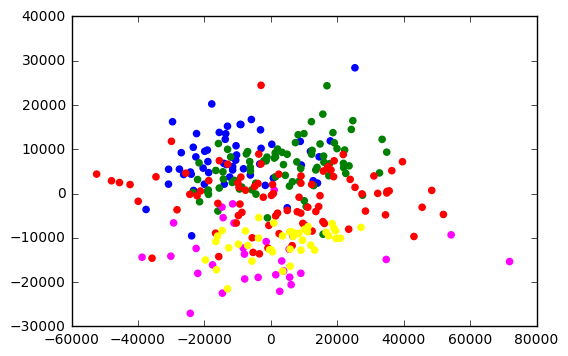

In [49]:
#圖表呈現
color = []
for i in y:
    if i == 0:
        color.append('red')
    elif i == 1:
        color.append('green')
    elif i == 2:
        color.append('blue')
    elif i == 3:
        color.append('yellow')
    elif i == 4:
        color.append('magenta')
        
print ('red:雷震','green:殷海光','blue:夏道平','yellow:龍平甫','magenta:蔣勻田')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X_reduced = PCA(n_components=3).fit_transform(X)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

'''X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color=color)'''
    
plt.show()